# Analyze PDF content with NLTK

Example notebook for how analyze a PDF file with the Natural Language Toolkit

#### Python environment installation instructions

General Packages:

    conda install numpy scipy matplotlib jupyter

PDF-specific packages:

    conda install tika

Text analysis:

    conda install nltk

    Download additional nltk ressources in python shell

        python nltk.download('punkt')
        python nltk.download('averaged_perceptron_tagger')
        python nltk.download('maxent_ne_chunker')
        python nltk.download('words')
        python nltk.download('treebank')
        python nltk.download('stopwords')

#### Example PDF file

The PDF file used in the example below can be downloaded from:

    https://doi.org/10.1073/pnas.1117201109

In [1]:
# set PDF filename/filepath parameter; this PDF file will be used in all examples; 
pdf_name = '12980.full.pdf'

### Read PDF content using TIKA

General information about TIKA
https://cwiki.apache.org/confluence/display/TIKA/TikaServer

TIKA python API
https://github.com/chrismattmann/tika-python

In [2]:
# import parser from TIKA
from tika import parser

In [3]:
# read example PDF definded above
parsedPDF = parser.from_file(pdf_name)

In [4]:
# parsed pdf is stored as a dictionary; here we get the keys
parsedPDF.keys()

dict_keys(['status', 'metadata', 'content'])

In [5]:
# one of the keys provides the content
print(parsedPDF['content'])






































201117201 12980..12985


A quantitative quasispecies theory-based model of
virus escape mutation under immune selection
Hyung-June Woo and Jaques Reifman1

Biotechnology High Performance Computing Software Applications Institute, Telemedicine and Advanced Technology Research Center, US Army Medical
Research and Materiel Command, Fort Detrick, MD 21702

Edited by Peter Schuster, University of Vienna, Vienna, and approved June 28, 2012 (received for review October 18, 2011)

Viral infections involve a complex interplay of the immune
response and escape mutation of the virus quasispecies inside a
single host. Although fundamental aspects of such a balance of
mutation and selection pressure have been established by the qua-
sispecies theory decades ago, its implications have largely re-
mained qualitative. Here, we present a quantitative approach to
model the virus evolution under cytotoxic T-lymphocyte immune
response. The virus quasispecies dynamics a

## Analyze PDF text with Natural Language Toolkit

Analysis of the text in the PDF can be done using NLTK: https://www.nltk.org

In [6]:
import nltk

In [7]:
sentence = parsedPDF['content']

In [8]:
# first we tokenize the whole text
tokens = nltk.word_tokenize(sentence)

In [9]:
tokens

['201117201',
 '12980..12985',
 'A',
 'quantitative',
 'quasispecies',
 'theory-based',
 'model',
 'of',
 'virus',
 'escape',
 'mutation',
 'under',
 'immune',
 'selection',
 'Hyung-June',
 'Woo',
 'and',
 'Jaques',
 'Reifman1',
 'Biotechnology',
 'High',
 'Performance',
 'Computing',
 'Software',
 'Applications',
 'Institute',
 ',',
 'Telemedicine',
 'and',
 'Advanced',
 'Technology',
 'Research',
 'Center',
 ',',
 'US',
 'Army',
 'Medical',
 'Research',
 'and',
 'Materiel',
 'Command',
 ',',
 'Fort',
 'Detrick',
 ',',
 'MD',
 '21702',
 'Edited',
 'by',
 'Peter',
 'Schuster',
 ',',
 'University',
 'of',
 'Vienna',
 ',',
 'Vienna',
 ',',
 'and',
 'approved',
 'June',
 '28',
 ',',
 '2012',
 '(',
 'received',
 'for',
 'review',
 'October',
 '18',
 ',',
 '2011',
 ')',
 'Viral',
 'infections',
 'involve',
 'a',
 'complex',
 'interplay',
 'of',
 'the',
 'immune',
 'response',
 'and',
 'escape',
 'mutation',
 'of',
 'the',
 'virus',
 'quasispecies',
 'inside',
 'a',
 'single',
 'host',
 '.',

In [10]:
text = nltk.Text(tokens)

In [11]:
textname = text.name
print(textname)
text.name

201117201 12980..12985 A quantitative quasispecies theory-based model of...


'201117201 12980..12985 A quantitative quasispecies theory-based model of...'

In [12]:
# Collocations: words occuring together
text.collocations(num=10)

immune response; Acad Sci; Natl Acad; Proc Natl; Sci USA; viral load;
mutation rate; sequence space; amino acid; disease progression


In [13]:
# find common context of two words
text.common_contexts(["with", "and"])

)_the ,_a


In [14]:
# occurances of expression within context
text.concordance('virus' and 'cell', width=100, lines=3)

Displaying 1 of 1 matches:
eported refer to RNA copy numbers and cell counts within this volume . CTL Respo


In [15]:
# occurances of expression within context
text.concordance('RNA' and 'virus', width=100, lines=3)

Displaying 3 of 25 matches:
 virus escape mutation under immune selecti
 response and escape mutation of the virus quasispecies inside a single host . 
a quantitative approach to model the virus evolution under cytotoxic T-lymphocy


In [16]:
# occurances of expression within context as list
conclist = text.concordance_list('RNA' and 'virus')
for n, item in enumerate(conclist):
    print (n)
    print (conclist[n])

0
ConcordanceLine(left=[], query='virus', right=['escape', 'mutation', 'under', 'immune', 'selection', 'Hyung-June', 'Woo', 'and', 'Jaques', 'Reifman1', 'Biotechnology', 'High', 'Performance', 'Computing', 'Software', 'Applications', 'Institute', ','], offset=8, left_print='', right_print='escape mutation under immune selecti', line=' virus escape mutation under immune selecti')
1
ConcordanceLine(left=['18', ',', '2011', ')', 'Viral', 'infections', 'involve', 'a', 'complex', 'interplay', 'of', 'the', 'immune', 'response', 'and', 'escape', 'mutation', 'of', 'the'], query='virus', right=['quasispecies', 'inside', 'a', 'single', 'host', '.', 'Although', 'fundamental', 'aspects', 'of', 'such', 'a', 'balance', 'of', 'mutation', 'and', 'selection', 'pressure'], offset=88, left_print=' response and escape mutation of the', right_print='quasispecies inside a single host . ', line=' response and escape mutation of the virus quasispecies inside a single host . ')
2
ConcordanceLine(left=[',', 'it

In [17]:
# count number of occurences
text.count('virus')

26

In [18]:
# Dispersion plot for word occurences
text.dispersion_plot(['virus', 'cell', 'RNA'])

<Figure size 640x480 with 1 Axes>

In [19]:
# find specific expression in text
text.findall("<virus><dynamics>")

virus dynamics


In [20]:
text.index('virus')

8

In [21]:
text[82:89]

['response', 'and', 'escape', 'mutation', 'of', 'the', 'virus']

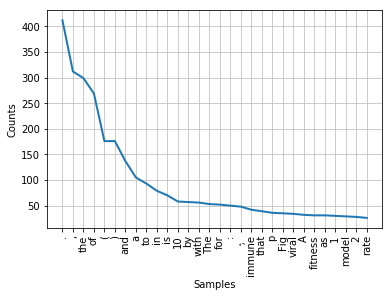

In [22]:
# plot frequency of words in text
text.plot(30)

In [23]:
# find similar words according to context
text.similar('model')

threshold wt boost flattest population patient representations measure
dynamics case description cross theory affect single paper mutant
determine foundation obtain


In [24]:
text.unicode_repr()

'<Text: 201117201 12980..12985 A quantitative quasispecies theory-based model of...>'

In [25]:
# analyze text vocabulary
vocabulary = text.vocab()
vocabulary

FreqDist({'.': 412, ',': 312, 'the': 299, 'of': 269, '(': 176, ')': 176, 'and': 137, 'a': 105, 'to': 93, 'in': 79, ...})

In [26]:
# get frequency of given word
vocabulary.freq('model')

0.00369379696853904

In [27]:
# get most common words in vocabulary
vocabulary.most_common(n=5)

[('.', 412), (',', 312), ('the', 299), ('of', 269), ('(', 176)]

In [28]:
# get all vocabulary terms
vocabulary.keys()

dict_keys(['133:427–452', 'si-', 'cðβÞ', 'Nature', 'ran-', '→', 'Muller', 'Virus', 'F', 'specification', 'Software', 'By', 'represented', 'these', 'transmitted', 'far', 'timing', 'standard', 'k', 'remains', 'sequencing', 'Program', '32', 'Evidence', 'Within', 'quantitative', '101', 'Ri', 'fixation', 'opinions', 'replicates', 'proportional', 'values', 'measures', 'estimate', 'force', 'applications', 'subse-', '1999', 'costs', 'studied', 'be', '2000', 'Althaus', 'concrete', 'In', 'Perelson', 'Typically', '30', 'polymorphisms', 'does', 'statis-', 'Solid', 'mutations', 'genotype-phenotype', 'De', 'Telemedicine', 'classic', 'single-nucleotide', 'Y', 'Department', 'simulations', 'Gaschen', 'work', 'range', 'increasing', 'cross', 'this', 'epitopes', 'host', 'Other', 'Microbiol', 'acute', 'Varia-', 'iÞðμ∕3Þdðj', 'given', '201117201', 'after', 'varia-', '1018', 'special', '407:386–390', 'phenotype', 'ð1∕aÞ', 'modeling', 'recently', 'quasispecies-based', 'DT', 'consistent', 'one-half', 'subseque

In [29]:
# get occurrence of given word in vocabulary
vocabulary['model']

29